#   **Prediction of Wine quality using regression and classification**



## Aim and a little about the data: 
This is a learning project where we conduct multiple methods of regression and classification on the same dataset to learn more about a wide range of  methods and its use cases as well as the various aspects of a data science project including EDA, preprocessing, modelling etc. We will be using the dataset "Wine Quality" provided in UCI's Machine Learning repository for our work.  

Our final aim is to be able to make prediction on the quality of wine given to us based on the parameters of our data set which will be done as two parts, one as classification where the integers from 0-10 as well as a binary classification of "excellent wine" and "average wine" are the classes for the quality of wine and the other part being regression where our final answer value can range from 0-10. This provides us the opportunity to get to know more about the various classification methods as well as regression methods.

We will be going through each step in high detail so as to cement all the concepts that have been learned both from a coding standpoint as well as a statistical standpoint making this python notebook quite apt for learning purposes. Note that this notebook is being done using "Google Colab"'s which is based on Jupyter Notebooks. We will mostly be using Pandas(for dataframe manipulation), numpy(array manipulation), seaborn and matplotlib(for plotting) and scikit-learn( for preprocessing,modelling and prediction).


In [0]:
# Importing necessary libraries
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Uploading our dataset from local source: 
from google.colab import files
files.upload()
# This line of code can be changed to get the data from wherever available.

Saving winequalityN.csv to winequalityN.csv


{'winequalityN.csv': b'type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\r\nwhite,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6\r\nwhite,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6\r\nwhite,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6\r\nwhite,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6\r\nwhite,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6\r\nwhite,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6\r\nwhite,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6\r\nwhite,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6\r\nwhite,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6\r\nwhite,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6\r\nwhite,8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12,5\r\nwhite,8.6,0.23,0.4,4.2,0.035,17,109,0.9947,3.14,0.53,9.7,5\r\nwhite,7.9,0.18,0.37,1.2,0.04,16,75,0.992,3.18,0.63,10.8,5\r\nwhite,6.6,0.16,0.4,1.5,0.044,48,1

In [67]:
# Loading the dataset in python with the name df and displaying first 20 rows: 
df=pd.read_csv("winequalityN.csv")
df.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Data cleaning/wrangling: 

Here we take the make the dataset usable for our work. This involves taking care of missing values, making sure all the object types are correct etc.

In [68]:
#Getting an overall picture of the data types and shape of our dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [69]:
# Taking sum of all missing values in each column:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Above, we can see that there are 13 columns and 6497 observations/rows. We also note that there are quite a few missing values. All the data types are correctly put however, we can change quality into a float object for regression.

### Handling missing variables: 
There are multiple ways of handling missing variables from removing all the columns to complex prediction methods for the missing variables. However, we will simply assume them to be the mean of the entire column. This allows us to retain the rest of the information of the observation with the missing data while making a reasonable assumption for the missing value.

In [0]:
df=df.fillna(df.mean())

We will change the object type whenever depending on the model we are going to use and we will do it in our modelling section. Hence we have completed our cleaning section of our project. Next we will do a exploratory data analysis to see which variables are useful and each of their relationships etc. We will be using matplotlib as well as seaborn to conduct our EDA.

# **Exploratory Data Analysis**

There are only 12 variables hence conducting an EDA is not that hard and we will be able to look at most variables in depth. First, we will take a  look at the summary statistics of the dataset.

In [71]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


One thing that we can take note of is that the different variables are on different scales, and hence we might be better of rescaling all of the data which we will explore in the next section of preprocessing.

Next we will take a look at the correlation between all the variables by looking at the scatter plots between them.

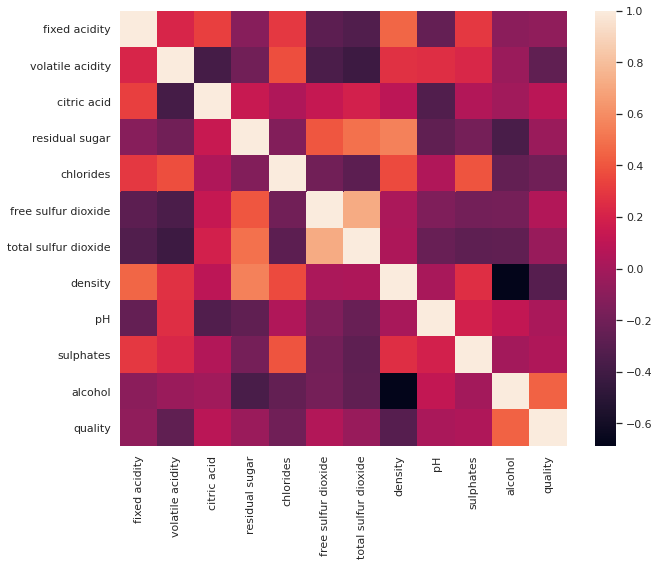

In [72]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

One point we can note is the fact that there  is a good amount of multicollinearity, which could be potentially taken care of by using methods such as Ridge Regression or lasso regression.

Next we will take a look at whether the color of the wine has a role in its quality. For that we will use boxplots.

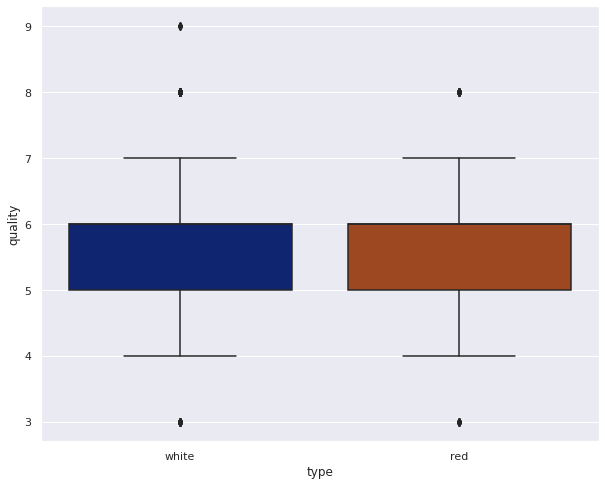

In [73]:
sns.boxplot(x="type",y="quality",data=df, palette="dark")
plt.show()

Here, we can see that there is no significant difference between the ratings of white and red wine and hence in the next section we can remove this column as it provides no additional information for predicting the quality of wine.

And finally we will take a look at the plots of the response variables and the various explanotory variables in our next part.


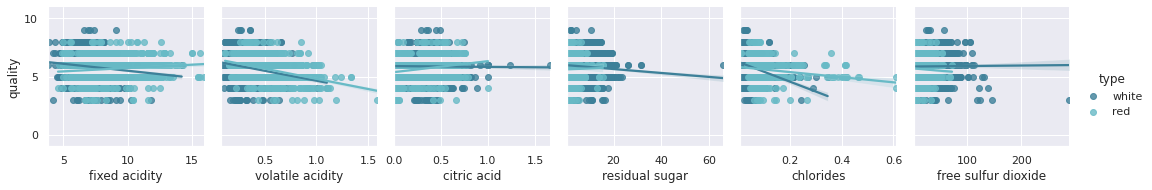

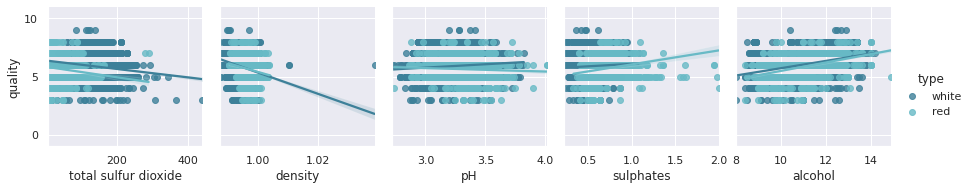

In [74]:
g = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[1:-6],palette="GnBu_d",hue="type")
g.map(sns.regplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);
g.add_legend()
plt.show()

a = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[-6:-1],palette="GnBu_d",hue="type")
a.map(sns.regplot)
a.set(ylim=(-1, 11), yticks=[0, 5, 10]);
a.add_legend()
plt.show()

One major point to note from the graph above is the categorical/ordinal nature of the response variable. This could mean that regression might not be the most optimal method for predicting values. Hence we will be comparing both, classification as well as regression models for our problems.Also note that even though the type of wine doesnt seem to have any notable impact on our response variable, it does seem to have a impact on the various independant variables. 


With this we conclude with our EDA section and move to our next portion that is data preprocessing using sk-learn.

# Data preprocessing 

Here we will prepare for our data for the modelling. First, we will remove the 'type' column as has shown to have no influence on our quality value.

In [0]:
df=df[df.columns.drop('type')]

One thing we could do is eliminate some more columns which are highly correlated with each other, however, since we will be using lasso as well as ridge regression we will not make any further adjustments.

Next,we will normalize the independant variables. so as to reduce bias towards any particular variables. This is quite useful as the range of the variables are highly varied between the variables and name our independant variables x and target variable y. We will scale the values of all our independant variables to a range of 0-1. We will leave our target variable as is for convenience.

In [0]:
x=df[df.columns.drop("quality")]
normalized_x=preprocessing.minmax_scale(x)
y=df["quality"]

And we have prepared our data as required, now, finally all we need to do is split the dataset into a training and testing dataset.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33, random_state=42)

We have now divided the data into a test set as well as a training set and hence we have come to an end of this section. 
Next we will move on to modelling the problem and testing.

# Modelling and testing: 
We will model using both classification and regression with multiple methods in each to give an overall idea.

## Modelling and testing for regression:
First we will start with linear regression and will be using Lasso, Ridge as well as ordinary linear regression for our data and compare the results and get an inference. We will be using the scikit Learn library for our regression as well as testing.

### Multiple linear regression with OLS(ordinary least squares): 
Firstly we will do basic linear regression without any penalty on complexity.




In [78]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression().fit(X_train,y_train)
clf.score(X_train,y_train)

0.2852550071222292

The score above gives us the R^2 value for our dataset which simply means the amount of variability that is explained by our model. Note that higher could mean better, but often times this could be an indication of over fitting. We will take a look at the root mean square error of our model on the test set to have a better idea of the predicting power of the model.

In [79]:
from sklearn.metrics import mean_squared_error
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print(train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
test_rmse

0.7449819789418428


0.7141299082752784

We got a RMSE value of 0.7141, which tells about how accurate our values are. Again, the RMSE value is not an absolute value of and needs comparision to truly know how well our model performs, however, considering that our models output ranges from 0-10, an approx. average error of 0.74 is a respectable value.

One important thing to note is that the RMSE of the test set is smaller than that of the training set which is a good sign as it indicates that overfitting is unlikely which means that lasso regression as well as ridge regression will not necessarily give us any better answers.

Another small observation I had made was that normalizing the data did not give any substantial Reduction in RMSE.

Next we will take a quick look at ridge regression and lasso regression and compare results from the three. Again, since there wasn't any signs of overfitting there is a good chance that ridge and lasso regressions will not give any better results and possibly even worse. 

### Multiple linear regression with Ridge regression:
Ridge regression based on L2 regularisation is a regression method that places a penalty on complexity of our model. What it essentially does is in addition to regular cost function of OLS, Ridge regression places a penalty on the size of the coefficients. This reduces the complexity by inducing a bias resulting in a lower variance. Note that we use RidgeCV(cross validation) for finding an optimal alpha which is the one hyperparameter of our model.

In [80]:
from sklearn.linear_model import RidgeCV
alpha= np.arange(0.01,10,0.1).tolist()
clf = RidgeCV(alphas=alpha).fit(X_train, y_train)
score=clf.score(X_train, y_train)
print("R^2 =", score)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print("train_rmse = ", train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print("test_rmse = ", test_rmse)


R^2 = 0.2851950069950777
train_rmse =  0.745013247489275
test_rmse =  0.7140757549369448


We can see that the values are exactly the same as Ridge regression converges towards a penalty of 0 for complexity and mimics regular linear regression.
Next we can take a look at lasso regression in the same manner.

### Multiple linear regression with Lasso regression: 

Lasso regression based on L1 regularisation is a regression method that places a penalty on the complexity not just by reducing the coefficient size but by reducing it to zero and hence effectively acting as a variables selector. This method is especially helpful if there are a large number of independant variables and we need to filter out some. However, again, since the model complexity is not high the prediction is not going to be any better than linear regression. Similar to Ridge regression, alpha is the hyperparameter.

In [81]:
from sklearn.linear_model import LassoCV
alpha= np.arange(0.01,10,0.1).tolist()
clf = LassoCV(alphas=alpha).fit(X_train, y_train)
score=clf.score(X_train, y_train)
print("R^2 =", score)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print("train_rmse = ", train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print("test_rmse = ", test_rmse)

R^2 = 0.23422232020682077
train_rmse =  0.7711192740448021
test_rmse =  0.7372391599844503


We can see that we have got substantially worse results here as some of the coefficients values have been reduced to zero and resulting in less accuracy. 

With this we come to an end of the regression section and we have found regular linear regression to be the best model out of the three. This can indicate that more complex models do not necessarily mean better models and models should be selected based on our knowledge.

Next we will take approach the same problem via classification in our next subsection.

## Modelling and testing for classification:
We will be doing quite a few models for classification as well as a basic understanding of why the accuracy and predictions are the way they are for the various methods.

### Classification with  K-Nearest Neighbours:

This is a fairly simple straightforward model which classifies each outcome based on its k nearest values. We will be choosing k =80( which is the sqrt of n), however, further research on optimal values can give us better values.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,y_train)
g=knn.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5445221445221445

We have formed the model and fitted it and got its F1-score which is a metric that combines precision as well as recall. And we have found it to be 0.544, which could be quite a bit better. We will be discussing possible reasons for the relatively low scores later.

### Classification with Support Vector Machines:
This is quite an elegant method which is quite effective however, performs its best in binary classification without many outliers and hence may not be able to perform its best here. We use the RBF kernal here as it a generally well suited kernal.

In [83]:
from sklearn import svm
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(X_train,y_train)
g=SV.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5599067599067599

The f1 score only shows marginal improvement.

### Classification with Naive Bayes: 
This is an extremely simple method that uses basic bayes theorem to get its outcome. A major advantage being its simplicity and efficieny. However, the model performs poorly when there is multicollinearity and works best with categorical values.
 We do not expect very high performance metrics for this particular method.

In [84]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
g=nb.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.4428904428904429

As expected, the score is considerably worse than the above two.

### Classification with Logistic regression:
 Here, we will be using logistic regression to predict the classes. Note that logistic regression works best with binary values as logistics regression has two outcomes. However, it can be used to predict multiclass variables by modifying the model.

In [85]:
from sklearn.linear_model import LogisticRegression
f=LogisticRegression(max_iter=10000)
f.fit(X_train,y_train)
g=f.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5501165501165501

The model performs in line with the rest of the model.

### Classification with Decision tree classifier :
Decision tree classifiers is a highly intuitive model which performs admirably with a large number of independant variables.

In [86]:
from sklearn.tree import DecisionTreeClassifier
f= DecisionTreeClassifier()
f.fit(X_train,y_train)
g=f.predict(X_test)
print(metrics.accuracy_score(y_test,g))
print(metrics.f1_score(y_test,g,average="micro"))

0.5920745920745921
0.5920745920745921


Decision tree classifier performs markedly better than the rest of the models.

### Classification with RandomForest Classifier: 
This is an esemble model( of sorts) which essentially combines a variety of decision trees so as to form models which are less sensitive to outliers.

In [87]:
from sklearn.ensemble import RandomForestClassifier
f= RandomForestClassifier()
f.fit(X_train, y_train)
g=f.predict(X_test)
print(metrics.accuracy_score(y_test,g))

0.6648018648018648


This model performs the best compared to the rest of our models.
One important point to note is that there is no best model for all situations. Just because RandomForest worked best for our problem does not mean it will work the best in every situation hence it is critical to have a basic theoritical understanding of all models we work with. These are few classification models. 
One of the reasons as to why our models perform poorly is due to the highly subjective nature of the dataset. We can also possibly improve these results by using different models or tweaking the hyperparameters of our current models.
Next,we will classify the wine into "bad wine", "good wine" and "excellent wine".

## New criteria for classification: 
It has been shown that accurate predictions for a scale of 1-10 is fairly difficult to predict for our given models with high amount of accuracy. One way to make it easier is by reducing the number of outcomes or classes. We ensure these classes are still meaningful to the observer. We group the wines with a quality of 1-3 in "bad wine", 4-7 in "good wine" and 8-10 in excellent wine.
We will start of making a new column in our dataset namely "wine_qual" for this new data.



In [88]:
def qual(a):
  if 1<=a["quality"]<=3 :
    return "bad wine"
  elif 4<=a["quality"]<=7 :
    return "good wine"
  else :
    return "excellent wine"
df["wine_qual"]=df.apply(qual,axis=1)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_qual
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine


Now that we have got our desired dataframe we can now classify them using some of the algorithms used above.

# Classification with reduced dataset: 
We will be using RandomForest and SVM for our classification this time.

In [95]:
y=df["wine_qual"]
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
f= RandomForestClassifier()
f.fit(X_train, y_train)
g=f.predict(X_test)
print("accuracy for RandomForestClassifier:", metrics.accuracy_score(y_test,g))

accuracy for RandomForestClassifier: 0.9771561771561772


In [97]:
from sklearn import svm
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(X_train,y_train)
g=SV.predict(X_test)
metrics.accuracy_score(y_test,g)
print("accuracy for Support Vector Machines: ", metrics.f1_score(y_test,g,average="micro"))

accuracy for Support Vector Machines:  0.9701631701631701


We can see a massive increase in accuracy when we reduced the number of classes while still managing to retain meaning of the output. With this we have come to an end to this project.